# Producción

Si has seguido la actividad de este blog hasta la fecha, deberías ser capaz de implementar y entrenar modelos sencillos de `Machine Learning` para diferentes tareas, como por ejemplo [redes neuronales convolucionales](https://sensioai.com/blog/042_cnns) para tareas de clasificación de imagen o [redes neuronales recurrentes](https://sensioai.com/blog/034_rnn_intro) para tareas de procesamiento de lenguaje. De ser así, es muy probable que en tu cabeza esté sonando una voz diciéndote: "muy bien, ¿y ahora qué?". Está muy bien ser capaz de llevar a cabo semejante tarea, no todo el mundo es capaz de ello y uno de los principales objetivos de este blog es el de aportar las herramientas necesarias a cualquiera para poder hacerlo. Sin embargo, de nada sirve entrenar un modelo si luego no lo vamos a **poner a trabajar**. Ésto significa dar acceso a nuestro modelo a cualquiera que quiera usarlo, por ejemplo a través de internet. Si, además, nuestro modelo soluciona un problema real por el que alguien esté dispuesto a darnos dinero, podremos incluso crear un negocio gracias a nuestras habilidades obtenidas a lo largo de los diferentes posts. Es precisamente de este tema del que empezamos a hablar en este post, y que seguiremos en los posteriores, cómo poner nuestras redes neuronales a trabajar.

## Entornos de Producción

El primer aspecto que tenemos que tener en cuenta a la hora de poner nuestros modelos a trabajar es el entorno de producción en el que se van a encontrar. ¿Estarán en una aplicación móvil? En este caso podríamos tener acceso a la cámara o micrófono del aparato, además de otros sensores, para hacer aplicaciones personalizadas. Sin embargo, existen muchísimos tipos diferentes de *smartphones*, algunos más potentes que otros, pero en general con una capacidad computacional limitada, diferentes sistemas operativos (todos ellos diferentes a los que usamos para implementar y entrenar nuestros modelos), etc.

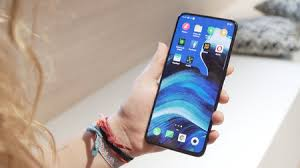

¿Estará nuestro modelo alojado en servidor accesible a través de una aplicación web? En este caso tendremos mayor control sobre nuestra aplicación así como mucho más poder computacional a nuestro alcance, aunque a un mayor coste de mantenimiento. Además, deberemos tener en cuenta que los datos y resultados viajarán a través de internet imponiendo restricciones en la latencia y posibles problemas de privacidad. 

![web](https://us.123rf.com/450wm/simmmax/simmmax1506/simmmax150600065/41673257-analytics-and-programming-vector-web-application-optimization-responsive-pc.jpg?ver=6)

¿Estará nuestro modelo funcionando en un tipo de *hardware* específico, como un coche o un robot? En este caso nuestro modelo deberá estar adaptado a la especificaciones de dicho *hardware*, lo cual implicará un esfuerzo extra de diseño pero con el potencial de poder llevar a cabo aplicaciones muy interesantes como, por ejemplo, conducción autónoma.

![tesla](https://media1.giphy.com/media/H7rpSYHRyYgamxQNqw/giphy-downsized-large.gif)

Como puedes ver, existen multitud de entornos de producción en el que pueden estar funcionando nuestros modelos, todos ellos muy diferentes a los entornos usados para la implementación y el entrenamiento de dichos algoritmos. Así pues, al estar desarrollando nuestros modelos, tenemos que ser conscientes del entrono en el que se van a ejecutar, lo cual impondrá ciertas restricciones que, de no tener en cuenta, solo resultarán en un fracaso total.

## Sirviendo predicciones

Si bien hemos visto que existen multitud de entornos diferentes en los que pueden estar trabajando nuestros modelos, podemos distinguirlos en dos grande categorías: *on device* vs *cloud*.

En el caso de las predicciones *on device*, nuestros modelos estarán trabajando directamente en el *hardware* del cliente. Puedes ser un *smarthpone* en el caso de una aplicación móvil, un ordenador portátil o de sobremesa en el caso de un programa o aplicación web en el que el modelo se ejecuta en el navegador web o directamente un coche para aplicaciones de conducción autónoma o un robot.

| Pros | Contras |
|------|---------|
| Privacidad | Computación |
| Latencia | Energía |
| Coste | Monitoreo |
| Flexibilidad | Software |

Cuando nuestros modelos trabajan directamente en el *hardware* del cliente tendremos que lidiar con los requisitos computacionales disponibles, que pueden ser limitados. Además, en aquellos dispositivos que se alimentan con baterías, tendremos que tener en cuenta cuestiones energéticas ya que algunos modelos pueden necesitar mucha energía para llevar a cabo los cálculos necesarios. También tendremos que tener en cuenta que para ejecutar los modelos es posible que tengamos que adaptarlos o traducirlos para que funcionen con el software nativo del dispositivo (que puede ser diferente al usado para la implementación y entrenamiento del modelo). Por otro lado, disfrutaremos de una menor latencia ya que no tendremos que enviar datos y recibir predicciones, un mayor control sobre los costes, mejor privacidad y, sobre todo, una mayor flexibilidad en el tipo de aplicación.

En el caso de las predicciones *cloud*, nuestro modelo estará ejecutándose en un servidor en la nube al cual se podrá conectar cualquier aplicación para recibir predicciones. En esta alternativa, las ventajas e inconvenientes mencionadas antes se invierten.

| Contras | Pros |
|------|---------|
| Privacidad | Computación |
| Latencia | Energía |
| Coste | Monitoreo |
| Flexibilidad | Software |

También existe una opción intermedia conocida como *edge computaing*, utilizada en aplicaciones como *smart cities* o *smart factories* en las que se necesita mucho poder computacional con unos requisitos de latencia bajas. En este caso, se disponen servidores potentes cerca de los sensores, los cuales se conectan a éstos para enviar datos y generar las predicciones.

## Siriviendo predicciones en la nube

De las diferentes alternativas, servir predicciones en la nube es la más sencilla para empezar ya que podremos utilizar nuestros modelos con pequeños cambios. En la siguiente imagen puedes ver diferentes alternativas que tenemos para poner nuestros modelos a trabajar en la nube.

![](./cloud.png)

La opción más simple es la de usar un servidor `HTTP`, en el caso de `Python` podemos usar la librería `Flask`. En este caso podremos integrar nuestro modelo y código en `Python` de manera muy sencilla y habilitar un `endpoint` al que poder enviar datos y recibir imágenes. Si bien es la opción más sencilla, es la menos escalable, por lo que sólo se aconseja usarla para pruebas de concepto. En el caso de necesitar soluciones más escalables, tenemos alternativas como utilizar servidores en Google Cloud, AWS o Azure con soluciones pre-configuradas (que dependerán de cada proveedor) o bien definiendo configuraciones desde cero en las que tener más control. Obviamente, en estos casos, la dificultad de uso aumenta de manera considerable. 

En este post vamos a ver un ejemplo sencillo de cómo definir un servidor usando `Flask` y habilitar su acceso a través de internet para recibir imágenes y devolver las etiquetas calculadas por un modelo de clasificación de imágenes sencillo.

## Flask

[Flask](https://flask.palletsprojects.com/en/1.1.x/) es una librería de `Python` que nos facilita la vida a la hora de implementar un servidor web. Como su propio nombre indica, un servidor web es un programa que es capaz de "servir" datos a través de internet. Por ejemplo, cuando vas a google.com un servidor web te sirve la página web de google, un documento `html` que tu navegador interpreta renderizando todo el texto, imágenes y links que luego ves en la pantalla. En nuestro caso, utilizaremos un servidor para ejecutar nuestra red neuronal y devolver las predicciones calculadas.

> Puedes instalar `Flask` con el comando `pip install flask`. Para hacer nuestro servidor trabajaremos con *scripts* de `Python`, para lo que necesitarás un editor de texto o un *IDE* (*integrated developement environment*). Aquí usaremos [VSCode](https://code.visualstudio.com/). Puedes aprender más sobre `Python`, instalación de librerías y cómo trabajar con *scripts* en este [post](https://sensioai.com/blog/001_python).

### Flask *hello world*

Un vez instalada la librería, abre un nuevo documento (puedes llamarlo *hello.py*) y añade el siguiente código.

In [ ]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

if __name__ == "__main__":
    app.run()

Si ahora ejecutas el *script*, `Flask` iniciará un servidor en tu máquina con una sola ruta (definida en la función `hello_world`), la cual nos devolverá el *string* `Hello, World!`.

![](./code1.png)

Una vez iniciado el servidor, `Flask` habilita una `url` para podernos conectarnos al mismo. Por defecto, esta `url` es `http://127.0.0.1:5000/`. Si abres un navegador y visitas esta dirección, recibirás el resultado devuelto por la función `hello_world`.

![](./flask1.png)

Si bien esta es la forma más sencilla de conectarnos a nuestro servidor, nuestro objetivo es el de poder enviar datos al mismo para recibir luego los resultados de nuestro modelo. Para ello necesitaremos utilizar alguna herramienta que nos lo permita. Una muy útil es `curl`, un programa que nos permite conectarnos con servidores a través del terminal.

![](./curl.png)

Puedes probar ahora a añadir nuevos `endpoints`, definiendo nuevas funciones en el *script* con el decorador `@app.route('/endpoint')` donde puedes sustituir `endpoint` por la palabra que quieras usar para conectarte con el servidor. Además, estas rutas también aceptan parámetros para modificar su comportamiento o crear rutas dinámicas. Puedes aprender más sobre esto en la [documentación](https://flask.palletsprojects.com/en/1.1.x/quickstart/#quickstart) de `Flask`.

### Desplegando en Heroku

En este punto tenemos ya nuestro servidor funcionando, sin embargo si ahora intentas conectarte a la `url` desde otro ordenador verás que no recibes respuesta. Esto es debido a que tu servidor solo es visible para tu propia máquina (esto es lo que significan los números `127.0.0.1:5000`, `127.0.0.1` es tu `IP` local y `5000` es el puerto en el que está escuchando el servidor. Para poder acceder a nuestro servidor desde cualquier parte del mundo necesitamos una `url` similar a `midominio.com`, y para ello necesitaremos algún tipo de servicio de `hosting` en la nube. De entre los diferentes servicios que existen, uno fácil de utilizar y con buena integración con `Flask` es [Heroku](https://www.heroku.com/).

Una vez creada tu cuenta (selecciona `Python` como el lenguaje principal) podrás crear una nueva aplicación desde el `dashboard`. 

![](./heroku1.png)

Tras darle un nombre a tu aplicación, conéctala con un repositorio de Github. Para ello tendrás que crear un repositorio como el que puedes encontrar [aquí](https://github.com/sensioai/flask). Para que todo funcione bien necesitarás un par de archivos adicionales, además de tu *script* de `Python` con el servidor

- `Procfile`: es un archivo especial que le indica a Heroku como arrancar el servidor. Puedes usar el mismo archivo que verás en el repositorio de ejemplo (simplemente asegúrate de llamar a tu *script* `app.py`).
- `requirements.txt`: contiene las librerías de `Python` que requiere nuestro servidor para funcionar. Como mínimo necesitarás incluir `Flask`, `Flask-CORS` y `gunicorn`. Después, tendrás que incluir otras librerías como `Numpy`, `Pytorch` o cualquier otra que necesites.

> La librería `Flask-CORS` es necesaria para poder utilizar nuestro servidor desde cualquier navegador sin problemas.

![](./heroku2.png)

y activa el *deployment* automático para que cada vez que hagamos cambios en el código y hagamos *push* de la rama principal, se actualice nuestra aplicación de manera automática.

![](./heroku3.png)

En la misma ventana, clica en el botón *Deploy Branch* para hacer el primer despliegue. Una vez termine el proceso, puedes abrir la aplicación con el botón *Open app*. Si todo va bien, aparecerá una nueva pestaña con la `url` de la aplicación que ahora es accesible desde cualquier parte del mundo ! Aquí puedes ver un ejemplo https://sensioai-blog-flask.herokuapp.com/

> Si heroku no es capaz de reconocer tu aplicación de `Python`, asegúrate de tener seleccionado el *buildpack* de `Python` en los `Settings`.

Ahora que ya sabemos cómo crear y desplegar nuestra aplicación sólo nos queda añadir nuestro modelo y habilitar una ruta para recibir imágenes y devolver las predicciones generadas por nuestro modelo.

### Sirviendo predicciones

En este [notebook](https://colab.research.google.com/github/sensioai/blog/blob/master/051_gans/gans.ipynb) encontrarás el proceso completo para entrenar una red convolucional para clasificación de imágenes aéreas. Una vez ejecutado el notebook, encontrarás un archivo llamado `model.zip` que deberás adjuntar al código de tu aplicación `Flask`. En la siguiente implementación verás una nueva ruta llamada `predict` a la cual podremos enviar imágenes y recibir las predicciones de nuestro modelo.

In [ ]:
from flask import Flask, request
from flask_cors import CORS
import torch
import numpy as np
from PIL import Image

app = Flask(__name__)
CORS(app)

model = torch.jit.load('model.zip')

@app.route('/')
def hello_world():
    return 'Hello, World!'

@app.route("/predict", methods=['POST'])
def predict():

    # load image
    img = Image.open(request.files['file'].stream).convert(
        'RGB').resize((224, 224))
    img = np.array(img)
    img = torch.FloatTensor(img.transpose((2, 0, 1)) / 255)

    # get predictions
    preds = model(img.unsqueeze(0)).squeeze()
    probas = torch.softmax(preds, axis=0)
    ix = torch.argmax(probas, axis=0)

    return {
        'label': model.labels[ix],
        'score': probas[ix].item()
    }

if __name__ == "__main__":
    app.run()

Si ahora actualizas la rama del repositorio de Github, también se actualizará la aplicación de Heroku de manera automática. asegúrate de actualizar también el archivo con las dependencias (`requirements.txt`) para incluir las nuevas librerías. Una vez completado el proceso, tenemos ya nuestro modelo disponible a través de la `url` proporcionada por Heroku. Podemos usar `curl` con ejemplos de imágenes del dataset utilizado para entrenar el modelo de la siguiente manera.

![](./predict.png)

> Puedes utilizar el [repositorio](https://github.com/sensioai/flask) de muestra como base para tu propia aplicación.

## Resumen

En este post hemos empezado a ver las diferentes alternativas que encontramos a la hora de poner nuestros modelos a trabajar. En función de nuestra aplicación, estos algoritmos podrán ser ejecutados en los dispositivos de nuestros usuarios o bien en servidores en la nube controlados por nosotros mismos. Ambas alternativas presentan sus propias ventajas y desventajas en términos de privacidad, flexibilidad o poder computacional entre otros. También hemos veisto un ejemplo de cómo podemos desplegar un servidor en la nube para servir predicciones utilizando la librería `Flask` y `Heroku`. Si bien de esta manera hemos puesto a disposición de cualquier usuario nuestro modelo a través de internet, lo más común es interactuar con estas APIs a través de interfaces de usuario como, por ejemplo, aplicaciones web. En próximos posts veremos cómo podemos crear este tipo de interfaces y conectarlas con nuestro servidor.